In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\projects\bigsales\big.csv"
df= pd.read_csv(filepath2)
print(df)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDT36         12.3          Low Fat         0.111448   
1               FDT36         12.3          Low Fat         0.111904   
2               FDT36         12.3               LF         0.111728   
3               FDT36         12.3          Low Fat         0.000000   
4               FDP12          9.8          Regular         0.045523   
...               ...          ...              ...              ...   
14199           FDG47         12.8          Low Fat         0.069606   
14200           FDG47         12.8          Low Fat         0.070013   
14201           FDG47         12.8          Low Fat         0.069561   
14202           FDG47          NaN          Low Fat         0.069282   
14203           FDG47         12.8          Low Fat         0.069727   

           Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0       Baking Goods   33.4874            OUT049        

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [7]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

item_fat_content has 5 unique values : ['Low Fat' 'LF' 'Regular' 'reg' 'low fat'] 

item_type has 16 unique values : ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods'] 

outlet_identifier has 10 unique values : ['OUT049' 'OUT017' 'OUT018' 'OUT019' 'OUT046' 'OUT013' 'OUT027' 'OUT045'
 'OUT035' 'OUT010'] 

outlet_establishment_year has 9 unique values : [1999 2007 2009 1985 1997 1987 2002 2004 1998] 

outlet_size has 3 unique values : ['Medium' 'Small' 'High'] 

outlet_location_type has 3 unique values : ['Tier 1' 'Tier 2' 'Tier 3'] 

outlet_type has 4 unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [8]:
df['item_fat_content'] = df['item_fat_content'].str.replace('Low Fat|LF|low fat','low',regex=True)

In [9]:
df['item_fat_content'] = df['item_fat_content'].str.replace('Regular|Reg','reg',regex=True)

In [10]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

item_fat_content has 2 unique values : ['low' 'reg'] 

item_type has 16 unique values : ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods'] 

outlet_identifier has 10 unique values : ['OUT049' 'OUT017' 'OUT018' 'OUT019' 'OUT046' 'OUT013' 'OUT027' 'OUT045'
 'OUT035' 'OUT010'] 

outlet_establishment_year has 9 unique values : [1999 2007 2009 1985 1997 1987 2002 2004 1998] 

outlet_size has 3 unique values : ['Medium' 'Small' 'High'] 

outlet_location_type has 3 unique values : ['Tier 1' 'Tier 2' 'Tier 3'] 

outlet_type has 4 unique values : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [11]:
df[['outlet_type']].value_counts()

outlet_type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [12]:
df.isnull().sum()

item_identifier                 0
item_weight                  2389
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                     0
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [13]:
df= df.dropna()

In [14]:

df=df.drop('item_identifier',axis=1)

In [15]:
df.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,12.3,low,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,12.3,low,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,12.3,low,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,12.3,low,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,9.8,reg,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


<AxesSubplot:ylabel='item_outlet_sales'>

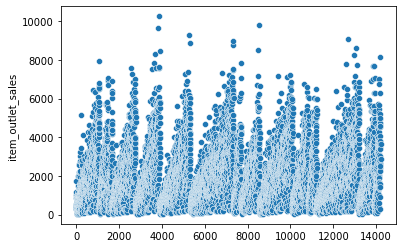

In [16]:
sns.scatterplot(data =df['item_outlet_sales'])

<AxesSubplot:ylabel='item_mrp'>

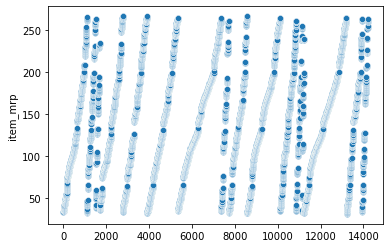

In [17]:
sns.scatterplot(data =df['item_mrp'])

In [18]:
df1=df

In [19]:
#sn.pairplot(df,hue='item_outlet_sales',palette="winter")

In [20]:
df1.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,12.3,low,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,12.3,low,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,12.3,low,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,12.3,low,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,9.8,reg,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
list1=['item_fat_content','item_type','outlet_identifier','outlet_size','outlet_location_type','outlet_type']
for i in list1:
    df1[i]=le.fit_transform(df1[i])

df1.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


In [25]:
x=df1.drop(['item_outlet_sales'],axis=1)

In [27]:
y=df1['item_outlet_sales']


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.3,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8270, 10), (3545, 10), (8270,), (3545,))

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score ,accuracy_score  
lin_reg=r2_score (y_test,y_pred)*100
lin_reg

50.965781326350005

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)

In [33]:
rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 47.43397191084192


In [36]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
la_pred=la.predict(x_test)

In [35]:
la_score=r2_score(y_test,la_pred)*100
print("Accuracy score for LR :",la_score)

Accuracy score for LR : 50.93831115912491


In [39]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)

In [40]:
svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : -3.576248128247883


In [42]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 50.96558683728969


In [44]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg,rr_score,la_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,50.965781
1,Ridge Reg,50.965587
2,Lasso Reg,50.938311
3,RandomForest Reg,47.433972
4,Support Vector Reg,-3.576248
